In [88]:
import numpy as np 
import matplotlib.pyplot as plt
import time

Fontsize=16
AX=16
TICKS=14
LEGEND=16
TITLES=18

plt.rc('lines',linewidth=0.8)
plt.rc('font', size=Fontsize)          # controls default text sizes
plt.rc('axes', titlesize=AX)     # fontsize of the axes title
plt.rc('axes', labelsize=AX)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=TICKS)    # fontsize of the tick labels
plt.rc('ytick', labelsize=TICKS)    # fontsize of the tick labels
plt.rc('legend', fontsize=LEGEND)    # legend fontsize
plt.rc('figure', titlesize=TITLES)
plt.rc('xtick.major', pad=7) 

In [89]:
test1 = "TAGCTAGTAGAGTTAG"

In [208]:
def create_KmersTable(string,kmersize):
    '''
    Create a dictionary with key = kmer and value = abundance of kmer
    
    '''
    
    kmers = dict()
    for i in range(len(string)-kmersize+1):
        if (string[i:i+kmersize]) in kmers:
            kmers[string[i:i+kmersize]] += 1
        else: 
            kmers[string[i:i+kmersize]] = 1
            
    return kmers
def list_Kmers(kmerstable):
    '''
    return kmerstable keys = Kmers in a list
    '''
    return list(kmerstable.keys())

def kmer_abundace(kmer,kmerstable):
    '''
    return kmer abundance for a specfick key.
    
    '''
    return (kmerstable.get(kmer))

def kmers_distri(kmertable):
    '''
    return an array with distribution of kernel 
    
    '''
    occurencies = list(kmertable.values())
    distri=np.zeros(max(occurencies)+1)
    for i in occurencies:
        distri[i] += 1
    return distri

In [215]:
kmertable1 = create_KmersTable(test1,3)
kmertable1

{'TAG': 4,
 'AGC': 1,
 'GCT': 1,
 'CTA': 1,
 'AGT': 2,
 'GTA': 1,
 'AGA': 1,
 'GAG': 1,
 'GTT': 1,
 'TTA': 1}

In [218]:
a=kmers_distri(kmertable1)
print(np.arange(0,len(a)),a)

[0 1 2 3 4] [0. 8. 1. 0. 1.]


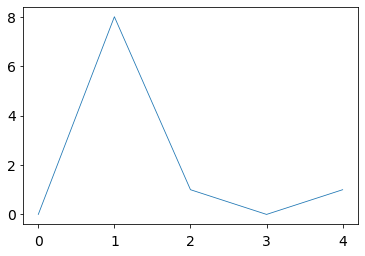

In [219]:
plt.plot(np.arange(0,len(a)),a)

In [212]:
list_Kmers(kmertable1)

['TAG', 'AGC', 'GCT', 'CTA', 'AGT', 'GTA', 'AGA', 'GAG', 'GTT', 'TTA']

In [214]:
kmer_abundace("TAG",kmertable1)

4

In [220]:
def fastaReader(filename):
    with open("./{}".format(filename),"r",encoding='utf-8', errors='ignore') as test1:
        text_pure =test1.readlines()
    all_string=""
    for i in range(1,len(text_pure),4):
        #print(text_pure[i],end="")
        all_string=all_string+text_pure[i][:-1]
        #all_string.append(text_pure[i])
    return all_string

In [222]:
def GenerateDistriPlot(filename,kmersize):
    '''
    Generate plot of distribution based on a kmersize and a file
    file should be in the working directory
    '''
    #plt.figure()
    start_time = time.time()
    allword_1line = fastaReader("{}".format(filename))
    KmerTable= create_KmersTable(test10x,kmersize)
    distribut = kmers_distri(KmerTable)
    #print("Mean abundance")
    #print(np.mean(distribut))
    plt.plot(np.arange(0,len(distribut)),distribut,label="{}".formate(kmersize))
    #plt.axhline(np.mean(distribut),linestyle="-")
    plt.title("# Kmer distribution with kmersize {}".format(kmersize))
    plt.xlabel("Number of Kmers")
    plt.ylabel("Number count \n log scale ")
    plt.yscale("log")
    plt.legend(loc=(1.05,0.35))
    #print("--- %s seconds ---" % (time.time() - start_time))

In [223]:
def AddPlotAxDistri(ax,filename,kmersize):
    '''
    Generate plot of distribution based on a kmersize and a file
    file should be in the working directory
    '''
    #plt.figure()
    #start_time = time.time()
    allword_1line = fastaReader("{}".format(filename))
    KmerTable= create_KmersTable(test10x,kmersize)
    distribut = kmers_distri(KmerTable)
    #print("Mean abundance")
    #print(np.mean(distribut))
    ax.plot(np.arange(0,len(distribut)),distribut,label=kmersize)
    #ax.axhline(np.mean(distribut),linestyle="--")
    #ax.set_title("# Kmer distribution with kmersize {}".format(kmersize))
    ax.set_title(filename)
    ax.set_xlabel("Number of Kmers")
    ax.set_ylabel("Number count \n log scale ")
    ax.set_yscale("log")
    #ax.set_legend(loc=(1.05,0.35))
    #print("--- %s seconds ---" % (time.time() - start_time))

In [224]:
files_fastas = ["test100x.fastq.gz","test10x.fastq","test20x.fastq","test50x.fastq.gz"]
#files_fastas = [test100x.fastq.gz,test10x.fastq,test20x.fastq,test50x.fastq.gz]
kmers_sizes_vales=[5,10,15,20,50,75]
colors=["b","g","r","c","k","a"]

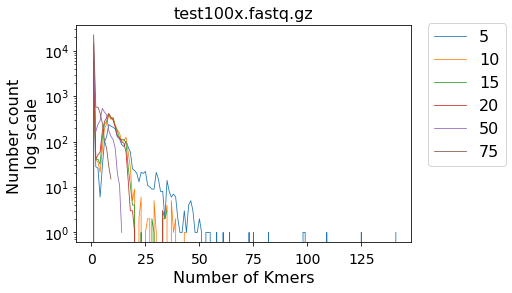

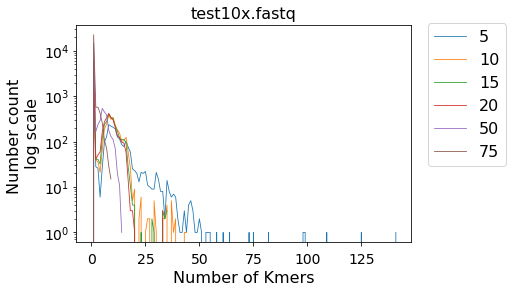

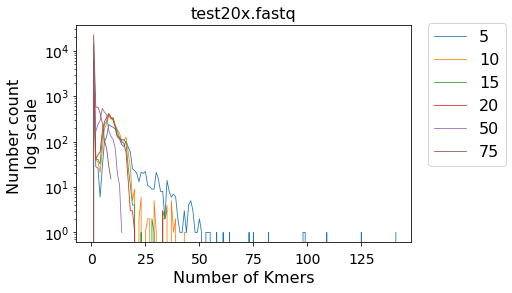

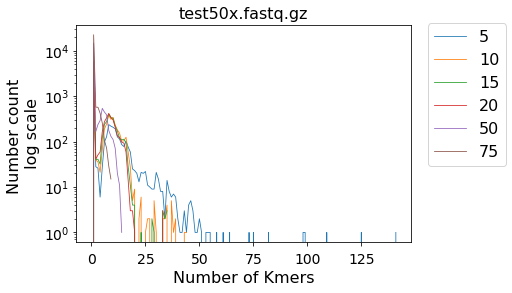

In [207]:
for name in files_fastas:
    plt.figure()
    for kmersize in kmers_sizes_vales:
        GenerateDistriPlot("test100x.fastq.gz",kmersize)
    plt.title(name)

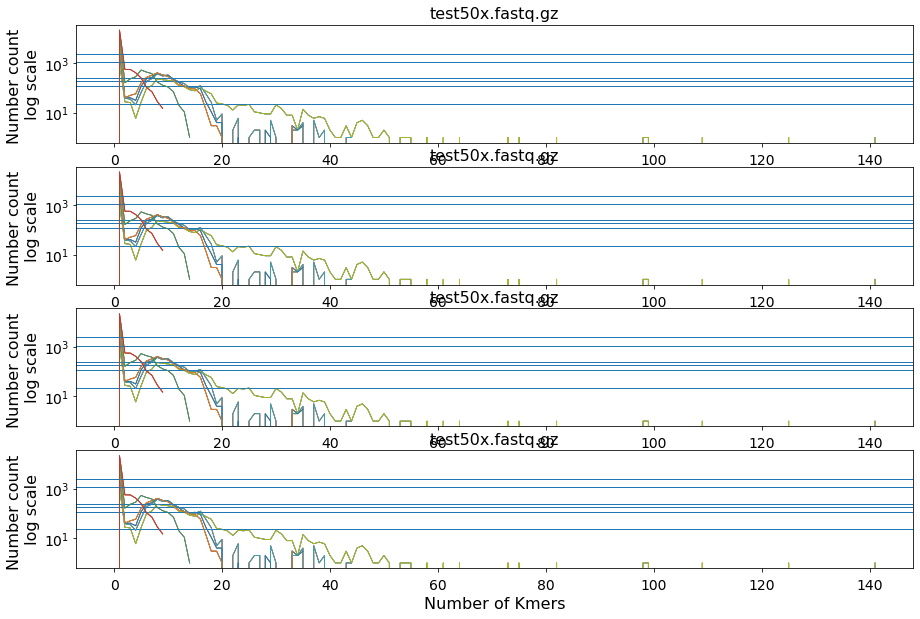

In [191]:
fix ,axes = plt.subplots(4,1,figsize=(15,10))
for ax in axes.flatten():
    for name in files_fastas:
        for kmersize in kmers_sizes_vales:
            AddPlotAxDistri(ax,name,kmersize)